# Handwritten Character Classification Using Convolutional Neural Networks (CNNs)

**Author:** Alperen Karadağ   **Date:** 12.09.2024

**Handwritten character classification** is a fundamental task in computer vision and pattern recognition, with applications ranging from digit recognition in postal sorting to text recognition in scanned documents. Although various supervised machine learning algorithms have been tested  for the use of image classifiction tasks of this nature, it is generally accepted that such classifications are more suitable endeavor for **deep learning** algorithms like **neural networks**.

**Convolutional Neural Networks (CNNs)** are a certain type of neural networks which function particularly effectively for image classification tasks due to their ability to capture **spatial hierarchies** in images. By using convolutional layers to detect edges, textures, and patterns, **CNNs** can achieve **high accuracy** in character recognition tasks compared to traditional machine learning algorithms.

For this project, we will use an **image directory** containing sets of labeled training images and a **dataset** consisting of directory file paths of said handwritten characters and their labels. The dataset is comprised of **grayscale images of characters**, each labeled with its corresponding character. 

First, we will **load**, **visualize**, and **preprocess** these images to make it suitable for training the CNN via data **normalization**, **reshaping**, and **splitting** into training and testing sets. 

We will then **construct** a **CNN** model using **Keras**, made up of **convolutional layers**, **pooling layers**, and **dense layers**. The model will be designed to automatically learn hierarchical features from the image data.

After that comes **compiling** and **training** the **CNN** on the preprocessed dataset, employing techniques such as data augmentation and dropout to improve generalization and prevent overfitting. 

This will bring us to the **assessment** phase of the performance of the trained model on metrics such as **validation accuracy** and **loss**. We will also visualize some **predictions** to understand the model's performance on the test set.

Finally, we will write a small **DEMO program** as an example of our neural network in action for image classification, while discussing the model’s strengths and limitations, and exploring potential improvements or future work in our **conclusion**.

The source of the dataset can be found on [this](https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset/data) page on **Kaggle**.

## Importing the Necessary Modules

In [118]:
import pandas as pd # Import pandas for data manipulation and analysis
import numpy as np # Import NumPy for numerical operations and array handling
import matplotlib.pyplot as plt # Import Matplotlib for creating static visualizations and plots.
import tensorflow as tf

## Displaying the Dataset

The **`DataFrame`** object provided by the **Pandas** module will be used to examine and process the student performance data. The **`read_csv()`** method is especially useful to carry this out as it returns a DataFrame object with rows and columns corresponding to the rows and columns in the file.

In [121]:
df = pd.read_csv("/Users/alperenkaradag/Desktop/Internship1/Project3/english.csv")

In [122]:
df

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


To see the full text of each sample email, you can use the code below and call the **`df`** dataframe again.

In [124]:
#pd.set_option('display.max_colwidth', None)

Another useful practice is using the **`info()`** method to get a summary of information regarding the **number of entries (rows)**, **index range**, **column names**, **non-null count**, **data types** and **memory usage** of the **`DataFrame`**.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3410 non-null   object
 1   label   3410 non-null   object
dtypes: object(2)
memory usage: 53.4+ KB


We have successfully **initialized** our dataset for the project. Before preprocessing the dataset however, we will see how to **display single** and **multiple** images with some useful **Python modules**, as image visualization and manipluation is an important part of these kinds of classification problems.

## Loading a Sample Image

In [129]:
import os # Commonly used for file and directory manipulation
import cv2 # Module from OpenCV (Open Source Computer Vision Library), provides tools to perform a variety of image processing tasks
from skimage import io # io module in skimage (also known as scikit-image) provides a range of input/output operations

The code down below is a simple way of displaying an image from its file path. 

The **`imread()`** method from **cv2** reads an image from the provided **file path** and loads it into a variable (**`imgg`**) as a multi-dimensional **NumPy** `array`. 

**`imshow()`** takes the image path as a **parameter** and displays it.

**`axis('off')`** removes the **axes** from the plot, which are also displayed by default.

**`show()`** is a **Matplotlib** function that **renders** the plot or image in a window or inline without showing the axis limits or any numbers.

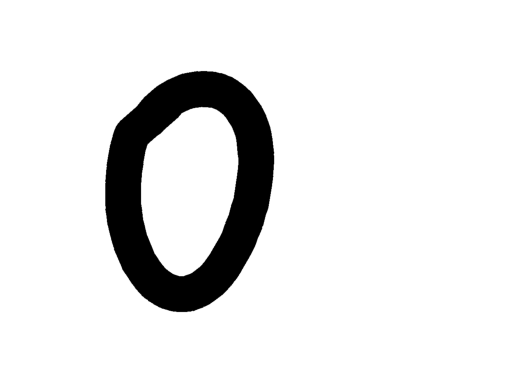

In [131]:
imgg = cv2.imread('/Users/alperenkaradag/Desktop/Internship1/Project3/Img/img001-001.png')
plt.imshow(imgg)
plt.axis('off')
plt.show()

## Loading Multiple Sample Images

Putting multiple images from a **common directory** at display takes a few more steps to pull off. As an example, we will display the first **20** images from the **Img** directory in **4** rows.

In [135]:
image_dir = '/Users/alperenkaradag/Desktop/Internship1/Project3/Img'  # Specify the directory containing images
# Combine image name with directory path to get full path
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.startswith('img001') and img.endswith(('.png'))] 
image_paths.sort() # Sort the image files alphabetically

The **`image_dir`** variable is assigned the path to the **directory** containing the images.

The **list comprehension** initialized to **`image_paths`** generates a list of full file paths for images in the directory that start with **`img001`**, images representing the character **'0'**, and end with **`.png`**, the file type of the images.

**`sort()`** reorganizes the list of image paths in **alphabetical order** when processing or displaying images.

In [136]:
images_per_row = 5  # Number of images per row
total_images = 20 #  Figure size
rows = (total_images // images_per_row) + (total_images % images_per_row > 0)  # Calculate number of rows

The **`figure()`** method ensures that when the images are plotted, they will fit into a figure with the **specified dimensions**, providing a clean and organized **grid layout**.

In [137]:
plt.figure(figsize=(20, 4)) # Display the first 20 images (or less if fewer images are available)

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

The final step involves a **for** loop that iterates over the first **20** images in the **`image_paths`** list.

The **`enumerate`** function provides both the index and the image path. The **`imread()`** method from **skimage** reads the image from the given path. The image is loaded into the **`image`** variable.

Creating a subplot is done with the **`subplot()`** method. The layout is determined by the number of rows (**`rows`**) and the number of images per row (**`images_per_row`**). **`index + 1`** determines the position of the subplot within the grid.

The **`cmap=plt.cm.gray`** parameter of **`imshow()`** optional and converts the image to grayscale if needed.

**`title()`** sets a title above each image. Here, the title is simply the index of the image (**`index + 1`**) to show the order, and the text size is set to **15**.

**`axis('off')`** makes the display cleaner and more focused on the images.

**`tight_layout()`** adjusts the spacing between subplots to minimize overlap and ensure a clean layout.


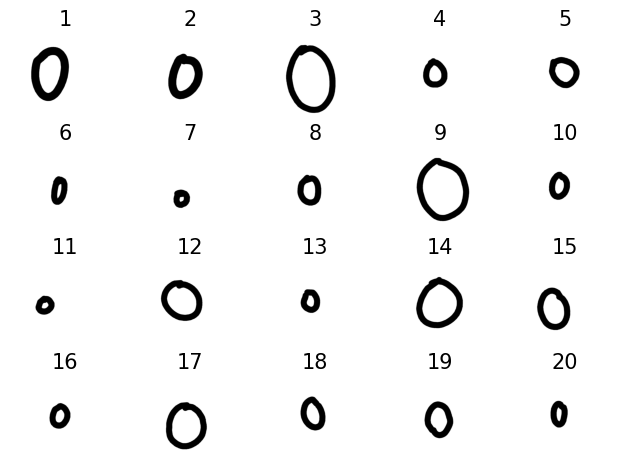

In [271]:
for index, image_path in enumerate(image_paths[:20]):  # Limit to the first 20 images
    
    image = io.imread(image_path) # Read the image
    plt.subplot(rows, images_per_row, index + 1) # Create a subplot for each image
    plt.imshow(image, cmap=plt.cm.gray)  # Convert to grayscale if needed
    plt.title(index+1, size=15)  # Set the title (here we use the index)
    plt.axis('off') # Turn off axis to make it cleaner
    
plt.tight_layout()

## Preprocessing the Data

We can now move on to a critical step of image classification: **data preprocessing**. It involves transforming **raw data** into a **suitable format** that can be effectively used by machine learning algorithms. Our neural network can work properly **only** if the data it's trained on satisfies the proper conditions in qualities like **image size**, **grayscale**, pixel value **normalization** and data **augmentation**.

In [141]:
base_dir = '/Users/alperenkaradag/Desktop/Internship1/Project3/'  # Base directory where your images are stored

For preprocessing, the DataFrame **`df`** is modified to include the full file paths for images and remove the old column containing relative file paths.

**`base_dir`** defines the base directory where the images are stored.

The **`apply()`** method is used to apply a function to each element in the **`image`** column. The **lambda** function takes each relative path **`x`** and concatenates it with **`base_dir`** to create the full path for the image in a newly created  **`full_image`** column.

The old **`image`** column is **dropped** and the **new column** is put in its place.

In [142]:
df['full_image'] = df['image'].apply(lambda x: os.path.join(base_dir, x)) # Concatenate base directory with relative file paths
df.drop('image', axis=1, inplace=True)
df = df[['full_image', 'label']]

We will define a **function** to **load**, **preprocess**, and **normalize an image** from a specified file path. It will come in handy for the **DEMO** program as well so turning this set of operations into a modular tool like this will prove quite useful.


**`imread()`** reads the image file from the given **`image_path`** as a NumPy array.

The first **if** statement checks if the image has an alpha channel (**RGBA**) by) by examining the last dimension of the array. If present, it discards the alpha channel and keeps only the RGB channels.
- **...** (**ellipsis**) represents all preceding dimensions. In this case, **`image[..., :3]`** means "select all dimensions except for the last one, and in the last dimension, select only the first three channel".

The second **if** statement converts the image to grayscale if it is in **RGB** format (3 channels). This is done by **averaging** the RGB values, which reduces the image to a single channel.
  
**`expand_dims()`** adds a new dimension to the image array to represent the **single channel (grayscale)**. This ensures the image has the shape expected by many neural network architectures, which **require** a channel dimension.
  
TensorFlow’s **`resize()`** method is used to resize the image to the specified **`target_size`**. This ensures that all images have the same dimensions, which is necessary for feeding them into a neural network.

The function normalizes pixel values to the range **[0, 1]** by dividing by **255.0**. Normalization helps improve the training stability and performance of neural networks.
   
At last, the function converts the **TensorFlow** tensor back to a **NumPy** array using **`numpy()`** and returns it.

In [143]:
def load_and_preprocess_image(image_path, target_size=(32, 32)):
    
    image = io.imread(image_path) # Load the image from file path
    if image.shape[-1] == 4: # If the image has an alpha channel (RGBA), convert it to RGB by discarding the alpha channel
        image = image[..., :3]
    if len(image.shape) == 3 and image.shape[-1] == 3:
        image = np.mean(image, axis=-1)  # Convert RGB to grayscale by averaging channels

    image = np.expand_dims(image, axis=-1) # Expand dimensions to add the channel dimension
    image_resized = tf.image.resize(image, target_size) # Resize image to target size
    image_resized = image_resized / 255.0 # Normalize image
    
    return image_resized.numpy()

The next part of preprocessing will involve setting up the **train** and **test** variables.

## Initializing the Train and Test Variables

In [146]:
from sklearn.model_selection import train_test_split

This module is used to **split** the dataset into a **training set**, which is used to train your machine learning model, and a **test set**, which is used to evaluate the model’s performance.

In [148]:
# Load and preprocess all images using full paths
X = np.array([load_and_preprocess_image(fp) for fp in df['full_image']])
y = df['label']

**`X`** holds the preprocessed image data, with each image resized, normalized, and formatted for input into the neural network.

**`y`** contains the labels for each image, which will be used for supervised learning to train the model. 

In [150]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The **_train_test_split_** method consists of these parameters:
- **`X`**: The feature matrix (input data).
- **`y`**: The target vector (output labels).
- **`test_size`**: Specifies the proportion of the dataset to include in the test split (e.g., 0.2 means 20% for testing and 80% for training).
- **`random_state`**: Controls the shuffling applied to the data before the split. Setting this ensures reproducibility of the split.
- **`X_train`**, **`X_test`**, **`y_train`, `y_test`**: The training and testing portions of the target vector.

In [152]:
# Print the shapes of the datasets to confirm
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2728, 32, 32, 1)
x_test shape: (682, 32, 32, 1)
y_train shape: (2728,)
y_test shape: (682,)


The **`pd.factorize()`** method returns a tuple with two elements:
- The **first** element is an array of integer labels.
- The **second** element is an array of unique values in the order they were encountered in **`y_train`**.

By printing the first and second element, we can observe that the train variables have been **randomly split**.

In [154]:
factlabel=pd.factorize(y_train)

print(factlabel[0])
print(factlabel[1])

[ 0  1  2 ...  6 46  8]
Index(['l', 'a', 'b', 'd', 'i', 'h', 'N', 'c', 'v', '4', 'u', 'U', 'P', 'm',
       'W', 'x', 'M', 'C', 'Q', 'f', 'S', 'w', 'p', '1', 'R', 'V', 'z', '5',
       'D', 'J', 'j', 'y', 'K', 'A', 'Z', '3', '8', '9', 'X', 'O', 'Y', 'g',
       's', '7', 'T', 't', 'F', 'o', '0', '2', 'I', 'H', 'E', 'r', 'B', '6',
       'q', 'L', 'e', 'G', 'n', 'k'],
      dtype='object')


## Normalizing the Dataset

Even though we've done **rudimentary normalization** in the preprocessing function, this won't be enough in many cases as you'll get training data in a form that is **different** from what the model is expecting. You might get data in the form of **32 bit floats** (**float32**) for example, instead of **8 bit unsigned integers** (**uint8**), which is what the model actually anticipates as input. Making this conversion is not difficult though, as using the **`normalize()`** method from cv2 module quickly gets the job done.

In [156]:
x_train = cv2.normalize(x_train, None, 1, 0, cv2.NORM_MINMAX, cv2.CV_8U)
x_test = cv2.normalize(x_test, None, 1, 0, cv2.NORM_MINMAX, cv2.CV_8U)

print(f"Normalized x_train shape: {x_train.shape}")
print(f"Normalized x_test shape: {x_test.shape}")

Normalized x_train shape: (2728, 32, 32, 1)
Normalized x_test shape: (682, 32, 32, 1)


In [157]:
x_train

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]],


       [[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [1],


As we can see, the **`X`** variables are in the **desired** data type.

In [158]:
y_train

2585    l
2030    a
2080    b
2172    d
2460    i
       ..
1095    J
1130    K
1294    N
860     F
3174    v
Name: label, Length: 2728, dtype: object

We can check one of the **`y`** variables for good measure as well.

## Label Encoding

**Label Encoding** is a technique used to convert categorical labels into numerical form. Each unique category is assigned an integer value. This is often used in machine learning to convert **categorical variables** into into a **numerical format** for use in machine learning algorithms.

In [161]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [162]:
sd = label_encoder.fit_transform(df['label'])

print(sd)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

[ 0  0  0 ... 61 61 61]


In the **`fit_transform()`** function,
 - **`fit`** learns the mapping of categorical labels to numerical values.
 - **`transform`** then applies this mapping to convert the categorical labels in **`label`** into numerical values.
 - **`sd`** will be an array of numerical labels corresponding to the original labels in the **`label`** column.

The labels in the training and testing **`y`** variables are then converted into numerical format based on the learned mapping.

In [163]:
# Get the mapping between original labels and encoded values
mapping = {original: encoded for encoded, original in enumerate(label_encoder.classes_)}

# Print the formatted list
formatted_list = ', '.join([f"{label}: {encoded}" for label, encoded in mapping.items()])
print(formatted_list)

0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, A: 10, B: 11, C: 12, D: 13, E: 14, F: 15, G: 16, H: 17, I: 18, J: 19, K: 20, L: 21, M: 22, N: 23, O: 24, P: 25, Q: 26, R: 27, S: 28, T: 29, U: 30, V: 31, W: 32, X: 33, Y: 34, Z: 35, a: 36, b: 37, c: 38, d: 39, e: 40, f: 41, g: 42, h: 43, i: 44, j: 45, k: 46, l: 47, m: 48, n: 49, o: 50, p: 51, q: 52, r: 53, s: 54, t: 55, u: 56, v: 57, w: 58, x: 59, y: 60, z: 61


The **full list** of labels have ensured us that the encoding process has been correctly carried out.

## Setting Up the Neural Network

With our training and testing data fully ready, we can finaly construct a **Convolutional Neural Network (CNN)** using **TensorFlow's Keras API**. Here’s a breakdown of fundamental components in a CNN:

- **Input Layer**: Accepts grayscale images of size 32x32 with 1 color channel (grayscale).
- **Convolutional Layers**: Extract features from images using various filter sizes.
- **Batch Normalization**: Stabilizes and speeds up training.
- **MaxPooling Layers**: Reduces spatial dimensions to retain important features.
- **Flatten Layer**: Converts the 3D feature maps into a 1D vector.
- **Dense Layers**: Fully connected layers to make predictions based on extracted features.
- **Dropout Layer**: Reduces overfitting by randomly dropping units during training.
- **Output Layer**: Produces a probability distribution over the 62 classes.

The number of layers in a CNN vary based on the complexity of the task at hand, with the standard qualifications of size being:
- **Simple CNNs**: 5-10 layers.
- **Moderate CNNs**: 10-20 layers.
- **Deep CNNs**: 20-50+ layers.

The layer by layer breakdown of this model is as such:

**Input Layer**:

- Specifies the input shape of the images. Each image is 32x32 pixels 

**First Convolutional Layer**:

   - **`32`**: Number of filters (feature maps).
   - **`(3, 3)`**: Size of the convolutional kernel (3x3 pixels).
   - **`activation='relu'`**: ReLU activation function to introduce non-linearity.

**Batch Normalization**:

   - Normalizes the output of the previous layer to stabilize and accelerate training.

**First MaxPooling Layer**:

   - **`(2, 2)`**: Pooling window size (2x2 pixels). Reduces the spatial dimensions by taking the maximum value in each window.

**Second Convolutional Layer**:

   - **`64`**: Number of filters.
   - **`(3, 3)`**: Kernel size.
   - **`activation='relu'`**: ReLU activation.

**Batch Normalization**:

   - Normalizes the output of the previous layer.

**Second MaxPooling Layer**:

   - **`(2, 2)`**: Pooling window size.

**Third Convolutional Layer**:

   - **`128`**: Number of filters.
   - **`(3, 3)`**: Kernel size.
   - **`activation='relu'`**: ReLU activation.

**Batch Normalization**:

   - Normalizes the output of the previous layer.

**Third MaxPooling Layer**:

- **`(2, 2)`**: Pooling window size.

**Flatten Layer**:

- Flattens the 3D output of the last convolutional layer into a 1D vector to be fed into the fully connected layers.

**Fully Connected Layer**:

- **`256`**: Number of neurons.
- **`activation='relu'`**: ReLU activation function.

**Dropout Layer**:

- **`0.2`**: Dropout rate (20%). Randomly sets 20% of the input units to 0 during training to prevent overfitting.

**Output Layer**:

- **`62`**: Number of output neurons (corresponding to the number of classes).
- **`activation='softmax'`**: Softmax activation function to produce probability distributions over the 62 classes.



In [167]:
CNN = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(32, 32, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(62, activation='softmax')
           ])

In [168]:
print(CNN.input_shape)

(None, 32, 32, 1)


The input shape indicates the **type** of data our model will be expecting, which in this case are **1 dimension (grayscale) 32x32 images**.

In [171]:
CNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,830 (940.74 KB)

 Trainable params: 240,382 (938.99 KB)

 Non-trainable params: 448 (1.75 KB)

The **`summary()`** method provides a **detailed overview** of a model's **architecture**. It also displays some additional information like:

**Param #**: Lists the number of parameters (weights and biases) in each layer. This helps in understanding the complexity and capacity of the model.

**Total Params**: Displays the **total** number of parameters in the model, including **both** trainable and non-trainable parameters.

**Trainable Params**: Shows the number of parameters that are **updated** during training.

**Non-Trainable Params**: Displays the number of parameters that are **not updated** during training (e.g., fixed weights in some layers).

## Compiling the Neural Network

The **`compile()`** method in **Keras** configures the model for training. It includes a key set of parameters that need to be properly set up for specific classifications.

**Optimizer**: Specifies the optimization algorithm to use for training the model. **`adam`** is a popular optimizer known for combining the advantages of two other optimizers: **`AdaGrad`** and **`RMSProp`**. It adjusts the learning rate during training and is often used as a default choice for many models due to its good performance and efficiency.

**Loss Function**: Specifies the loss function used to measure how well the model's predictions match the true labels. **`SparseCategoricalCrossentropy`** is used for classification problems where the labels are integers representing **class indices**. It computes the cross-entropy loss between the true labels and the predicted labels. It's particularly useful for problems where you have multiple classes and the labels are integers.

**Metrics**: A list of metrics to evaluate the performance of the model. In this case, **`accuracy`** is specified, which calculates the proportion of correct predictions. 

In [174]:
CNN.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics =['accuracy'])

## Fitting the Neural Network

The **`fit()`** method in **Keras** is used to train the model on the provided data. It also has parameters that are essential to cover.

1. **Training Data**:
   - **`x_train`**: The input data used to train the model. 
   - **`y_train`**: The target labels or outputs for the training data. 

2. **Validation Data**:
     - **`x_test`**: The input data for validation.
     - **`y_test`**: The target labels for the validation data. 

3. **Batch Size**: Specifies the **number** of samples that will be processed together in **one forward/backward pass** during training. A batch size of **32** means that the model will update its weights after processing every **32** samples.

4. **Epochs**: The **number of times** the **entire training dataset** will be passed through the model during training. Each **epoch** consists of a **complete** forward and backward pass over the entire training dataset.

Once the training process starts, **progress** will be shown through **each epoch** and validation metrics will be **provided** to monitor the model's performance on the **test data**.

In [177]:
CNN.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 50)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0790 - loss: 4.1133 - val_accuracy: 0.0293 - val_loss: 4.9733
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4375 - loss: 2.1111 - val_accuracy: 0.0249 - val_loss: 6.3607
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6619 - loss: 1.1398 - val_accuracy: 0.0205 - val_loss: 6.1322
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7888 - loss: 0.7497 - val_accuracy: 0.0220 - val_loss: 4.9790
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8480 - loss: 0.4975 - val_accuracy: 0.2346 - val_loss: 3.0356
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9024 - loss: 0.3242 - val_accuracy: 0.5235 - val_loss: 1.7947
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9488 - loss: 0.1878 - val_accuracy: 0.6012 - val_loss: 1.5032
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9490 - loss: 0.1759 - val_accuracy: 0.7023 - v

## Evaluating the Neural Network

To assess the performance of a trained model on a dataset, the **`evaluate()`** method is used.

1. **Inputs to `evaluate`**:
   - **`x_test`**: The input data for evaluation.
   - **`y_test`**: The true labels for the `x_test` data.

2. **Outputs from `evaluate`**:
   - **`loss`**: The value of the loss function computed on the test data. It represents how well the model's predictions match the true labels. Lower loss values indicate better model performance.
   - **`accuracy`**: The accuracy metric computed on the test data. It represents the proportion of correctly classified samples out of the total number of samples. Higher accuracy values indicate better performance.

In [180]:
loss, accuracy = CNN.evaluate(x_test, y_test)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6458 - loss: 2.0054
Validation Loss: 1.8088903427124023
Validation Accuracy: 0.6774193644523621


The validation accuracy will most likely deviate between the **mid 60s** up to the **low 70s** with the fairly **simple CNN model** we've implemented. This level of accuracy will **do the job** for the scope of predictions we'll be making with it.

## Predicting the Image Label

After everything we've done, our model is all **ready** to make predictions on new and unique test data. So as long as we ensure that new data is in the **correct type**, any test image we will throw at it is **fair game**.

In [183]:
image_p = '/Users/alperenkaradag/Desktop/Ex3.png'
image_ready = np.array([load_and_preprocess_image(image_p)])
image_ready = cv2.normalize(image_ready, None, 1, 0, cv2.NORM_MINMAX, cv2.CV_8U)

The preprocessing part that we've done before.

In [185]:
output = CNN.predict(image_ready)

predicted_indices = np.argmax(output, axis=1)

print(predicted_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[17]


The **`predict()`** method returns an array of predicted values. What we want to get from this array of values, however, is specifically the maximum value.

**`np.argmax()`** identifies the index of the maximum value along the specified axis. For classification problems, each entry in **`output`** is a vector of probabilities for each class. **`axis=1`** specifies that the function should look for the maximum value along the axis representing classes (i.e., for each sample).
     
**`predicted_indices`** entails which class (by index) the model has predicted for each image. And since there’s only one image, it will consist of a single value. 

## Handwritten Letter Classification **DEMO**

Technically speaking, we've **achieved** our goal and received a prediction from the model, but the output is in the form of **encoded integer** values rather than the original **string labels**. This is because during the training and evaluation of the model, categorical labels were converted into numerical formats to **facilitate processing** by the neural network.

After receiving the numerical prediction from the model, we need to **convert** these numbers back to their corresponding string labels to understand what the model has predicted in **human-readable** terms.

We will write a **DEMO** program to achieve this. This program will take a **file path** for an image as **input**, make a **prediction** with the **trained model**, output a predicted numerical index, use the **trained label encoder** to map the index back to one of the **string labels**, and **display** the result. This ensures that predictions are presented in a meaningful format aligned with the initial labels used in the dataset.

In [189]:
def predict_label(image_path):
    image_processed = np.array([load_and_preprocess_image(image_path)])  # Preprocess the image
    image_processed = cv2.normalize(image_processed, None, 1, 0, cv2.NORM_MINMAX, cv2.CV_8U) # Normalize the image
    
    prediction = CNN.predict([image_processed]) # Make prediction
    predicted_indices = np.argmax(prediction, axis=1)
    predicted_labels = label_encoder.inverse_transform(predicted_indices) # Use inverse_transform to get original labels
    
    plt.imshow(image_processed[0]) # Display input image
    plt.axis('off')
    print(f'The predicted label for the image is: {predicted_labels}') # Print the result

We can define another function called **`predict_label()`** to simplify the program.

- The function **loads** and **preprocesses** the image from the given file path, preparing it for input into the **CNN** model.

- Adds an **extra dimension** to the image data to match the input shape expected by the CNN.

- Uses the **trained CNN model** to **predict** the class of the processed image.

- **Converts** the predicted numerical class index back to the original label using **`label_encoder`**.

- Shows the preprocessed image using **Matplotlib** for visual inspection.

- **Outputs** the predicted label to the console.

Enter the file path of the image:  Desktop/Ex2.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The predicted label for the image is: ['B']


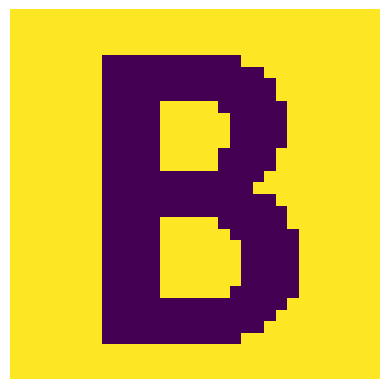

In [239]:
# Example usage
if __name__ == "__main__":
    file_path = input("Enter the file path of the image: ") # Input file path

    predict_label(file_path) # Predict and print the label

This code snippet allows the user to provide an image file path via standard input, then processes and predicts the label of the image using the **`predict_label`** function. Here’s a brief overview:

It **prompts** the user to enter the **file path** of an image. The provided file path is passed to the **`predict_label()`** function, which **processes** the image, makes a **prediction**, and **displays** the result.

You can create as many test images as you please by either **physically writing** and scanning letters or doing the same thing **digitally** and see how well the model functions. **Keep in mind** that the model is **expected to make mistakes** due to the accuracy range it performs in. The **key detail** is that it will make **sensible mistakes** that are similar in appearance to the correct label (Guessing **'B'** for the correct label of **'P'** for example). 

## Conclusion

In the end, we have successfully developed and evaluated a **Convolutional Neural Network (CNN)** for handwritten character classification. We've even written a basic **DEMO** program that can perform **predictions** by taking input and running it through the trained model. The **CNN** model demonstrated robust performance on our dataset, achieving a satisfactory validation accuracy of approximately **65-75%** during training. 

The **CNN's** architecture, which includes multiple **convolutional** and **pooling **layers, effectively captured the spatial **hierarchies** of the handwritten characters, enhancing its predictive power.For future applications and **predictive analysis**, this **CNN** model stands out as a reliable choice for accurate and efficient handwritten character recognition.

## References

- https://www.ibm.com/topics/machine-learning

- https://www.ibm.com/topics/supervised-learning

- https://www.ibm.com/topics/convolutional-neural-networks

- https://www.tensorflow.org/guide/keras

- https://scikit-learn.org

- Dhruvil Dave. (2020). English Handwritten Characters [Data set]. Kaggle.